# Tarea: Árboles de decisión
## Minería de datos, Unidad 1
### 6 de octubre de 2021
#### Alumno: Juan Pablo Maldonado Castro


## 2 Árboles en sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### 1. Creación y manipulación del dataframe para su uso

Podemos importar el *dataset* usando ```read_csv``` e indicando el parámetro: ```delim_whitespace=True```. Además, si revisamos el archivo de texto que venía incluido en la práctica, podemos identificar el nombre de cada columna que viene en el conjunto. Definimos esas columnas y aplicamos el ```read_csv``` para obtener el dataframe inicial de datos de entrenamiento y también el de datos de prueba.

In [2]:
cols = ['ID','Quality','fixedAcidityGt47','volatileAcidityGt17', 'volatileAcidityGt29', 'citricAcidGt30',
        'residualSugarGtMean', 'chloridesGt9', 'freeSulfurDioxideGtMean', 'totalSulfurDioxideGt27',
        'totalSulfurDioxideGt37', 'totalSulfurDioxideGt54','densityGt18', 'densityGt41', 'pHGtMean',
       'sulphatesGt12', 'sulphatesGt15', 'sulphatesGt19', 'sulphatesGt44', 'alcoholGt22', 'alcoholGt33',
       'alcoholGt47']

train_data = pd.read_csv('./vinoTinto_train.data', delim_whitespace=True, header = None, names = cols)
test_data = pd.read_csv('./vinoTinto_test.data', delim_whitespace=True, header = None, names = cols)
train_data

,ID,Quality,fixedAcidityGt47,volatileAcidityGt17,volatileAcidityGt29,citricAcidGt30,residualSugarGtMean,chloridesGt9,freeSulfurDioxideGtMean,totalSulfurDioxideGt27,...,densityGt18,densityGt41,pHGtMean,sulphatesGt12,sulphatesGt15,sulphatesGt19,sulphatesGt44,alcoholGt22,alcoholGt33,alcoholGt47
0,trainEx1,lowToMid,F,T,T,F,F,T,F,F,...,T,T,F,T,T,T,F,F,F,F
1,trainEx2,lowToMid,F,T,T,F,F,T,F,F,...,T,T,F,T,T,T,F,F,F,F
2,trainEx3,midToHigh,F,F,F,T,F,F,T,F,...,T,T,T,T,T,T,F,T,F,F
3,trainEx4,lowToMid,F,T,F,F,F,T,F,F,...,T,T,T,F,F,F,F,F,F,F
4,trainEx5,midToHigh,F,T,F,F,F,T,F,F,...,T,F,T,T,T,T,F,T,T,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,trainEx888,lowToMid,F,T,T,F,F,T,T,T,...,T,T,T,T,F,F,F,F,F,F
888,trainEx889,midToHigh,F,T,F,F,F,F,F,F,...,T,F,T,T,T,F,F,F,F,F
889,trainEx890,midToHigh,F,T,T,F,F,F,F,F,...,T,F,T,T,T,F,F,T,T,T
890,trainEx891,lowToMid,F,T,F,T,F,T,F,F,...,T,T,T,T,T,T,F,T,F,F


Observemos que hay una columna de **ID**, solo son identificadores del dato, por lo que no nos va a ser útil al momento de aplicar el árbol de decisión. Por esta razón la quitamos de nuestros dataframe.

In [3]:
train_data.drop('ID', axis = 1, inplace = True)
test_data.drop('ID', axis = 1, inplace = True)

Lo que sigue es separar la columna de etiquetas que queremos clasificar del resto de los datos que usaremos para entrenar el modelo. Para esto separamos los dataframe en ```x``` y ```y```, ```x``` siendo los datos generales y ```y``` las etiquetas.

In [4]:
x_train = train_data.drop('Quality', axis = 1)
y_train = train_data['Quality']
x_test = test_data.drop('Quality',axis = 1)
y_test = test_data['Quality']

Veamos nuestros datos.

In [5]:
x_train

,fixedAcidityGt47,volatileAcidityGt17,volatileAcidityGt29,citricAcidGt30,residualSugarGtMean,chloridesGt9,freeSulfurDioxideGtMean,totalSulfurDioxideGt27,totalSulfurDioxideGt37,totalSulfurDioxideGt54,densityGt18,densityGt41,pHGtMean,sulphatesGt12,sulphatesGt15,sulphatesGt19,sulphatesGt44,alcoholGt22,alcoholGt33,alcoholGt47
0,F,T,T,F,F,T,F,F,F,F,T,T,F,T,T,T,F,F,F,F
1,F,T,T,F,F,T,F,F,F,F,T,T,F,T,T,T,F,F,F,F
2,F,F,F,T,F,F,T,F,F,F,T,T,T,T,T,T,F,T,F,F
3,F,T,F,F,F,T,F,F,F,F,T,T,T,F,F,F,F,F,F,F
4,F,T,F,F,F,T,F,F,F,F,T,F,T,T,T,T,F,T,T,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,F,T,T,F,F,T,T,T,F,F,T,T,T,T,F,F,F,F,F,F
888,F,T,F,F,F,F,F,F,F,F,T,F,T,T,T,F,F,F,F,F
889,F,T,T,F,F,F,F,F,F,F,T,F,T,T,T,F,F,T,T,T
890,F,T,F,T,F,T,F,F,F,F,T,T,T,T,T,T,F,T,F,F


Notemos que los datos están en formato **T** (True) y **F** (False). Entonces lo que sigue es aplicar un *Encoder* a nuestros datos. La razón de esto es que *sklearn* no soporta el uso de datos categóricos expresados a manera de **string** al momento de construir árboles de decisión (el problema es discutido [aquí](https://github.com/scikit-learn/scikit-learn/issues/5442)). Vamos a aplicar un ```LabelEncoder``` que pasará todos **T** a 1 y **F** a 0 de manera automática

In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
for column in cols[2::]:
    x_train[column] = le.fit_transform(x_train[column])
    x_test[column] = le.fit_transform(x_test[column])

Ya que nuestros datos están codificados de manera adecuada para su uso en los modelos de entrenamiento, podemos dar por terminado este primer paso.

### 2. Construcción del árbol de decisión

Primero dividamos nuestro conjunto de entrenamiento en dos partes: un $15\%$ destinada a ser datos de prueba en este paso y el $85\%$ de entrenamiento. No usaremos el conjunto de prueba proporcionado iniclamente en el problema porque lo estamos reservando para ser probado con nuestro "modelo final".

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train_a, x_train_test, y_train_a, y_train_test = train_test_split(x_train,y_train,test_size=0.15, random_state=1)

Ya que tenemos las particiones, debemos evaluar los distintos modelos de árboles de decisión posibles. Vamos a probar un total de 34 árboles distintos. 17 de ellos serán árboles con el índice gini y la profundidad la vamos a ir variando en el rango $[2,18]$. Los otros 17 utilizarán entropía y también se irá variando su profundidad en $[2,18]$.

Definamos una función que nos permita evaluar el desempeño de todos los árboles de un criterio (entropía o índice gini). Para mí, lo más importante a considerar en este problema específico es la precisión. La razón de esto es que la precisión le da peso a los falsos positivos. Estoy pensando el problema de la siguiente manera: 

Supongamos que estamos clasificando vinos para venderlos al mercado bajo distintas etiquetas: calidad media-alta y calidad media-baja. Digamos que si encontramos un vino de calidad media-alta, consideramos un positivo y si encontramos uno de media-baja consideramos un negativo. En mi opinión es más deseable clasificar erróneamente un vino de calidad media-alta por accidente (falso negativo) y que quede entre los de calidad media-baja a clasificar un vino medio-bajo entre los de calidad media-alta (falso positivo). Si yo fuera dueño de esa empresa de vinos, querría evitar en la mayor medida de lo posible tener un accidente donde venda un vino de calidad media-baja como media-alta y que por ello me denuncien o pierda reputación como proveedor. Prefiero que alguien obtenga un vino medio-alto por accidente.

De todas maneras, no deberíamos descartar totalmente la métrica de sensibilidad. Por ello, pienso que sería adecuado usar $F_\beta = F_{0.5}$. 

En nuestra función imprimamos este puntaje $F_{0.5}$ para cada árbol, como extra también veamos la "accuracy" y $F_1$. Al final de todo esto, es conveniento observar los árboles que tuvieron el mejor desempeño basándonos en su valor de $F_{0.5}$.

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn import metrics

In [13]:
def printModels(crit):
    scores = {}
    for i in range(2,19):
        modelo = DecisionTreeClassifier(criterion = crit, max_depth = i)
        modelo = modelo.fit(x_train_a, y_train_a)
        yPred = modelo.predict(x_train_test)

        print(f"Árbol {crit[0]}{i}")
        print(f"Max_depth: {i}")
        print(f"Criterion: {crit}")
        print("Desempeño:")
        print(f"\tF_1 = {metrics.f1_score(y_train_test, yPred, pos_label = 'midToHigh')}")
        print(f"\tAccuracy = {metrics.accuracy_score(y_train_test, yPred)}")
        print(f"\tF_(0.5) = {metrics.fbeta_score(y_train_test, yPred, beta = 0.5, pos_label = 'midToHigh')}")
        print("\n")        
        scores[crit[0]+str(i)] = metrics.fbeta_score(y_train_test, yPred, beta = 0.5, pos_label = 'midToHigh')
        
    scores = ({k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse = True)})
    
    print("Mejores desempeños F_0.5:\n")
    counter = 0
    for i in scores:
        if(counter < 3):
            print(f"{i}: {scores[i]}")
        else:
            break
        counter += 1

Empezando por todos los árboles que tienen en su criterio al índice gini, tenemos lo siguiente:

In [14]:
printModels('gini')

Árbol g2
Max_depth: 2
Criterion: gini
Desempeño:
	F_1 = 0.596774193548387
	Accuracy = 0.6268656716417911
	F_(0.5) = 0.7061068702290078


Árbol g3
Max_depth: 3
Criterion: gini
Desempeño:
	F_1 = 0.7027027027027027
	Accuracy = 0.6716417910447762
	F_(0.5) = 0.7262569832402235


Árbol g4
Max_depth: 4
Criterion: gini
Desempeño:
	F_1 = 0.7581699346405228
	Accuracy = 0.7238805970149254
	F_(0.5) = 0.7671957671957672


Árbol g5
Max_depth: 5
Criterion: gini
Desempeño:
	F_1 = 0.7333333333333334
	Accuracy = 0.7014925373134329
	F_(0.5) = 0.7513661202185793


Árbol g6
Max_depth: 6
Criterion: gini
Desempeño:
	F_1 = 0.7450980392156863
	Accuracy = 0.7089552238805971
	F_(0.5) = 0.753968253968254


Árbol g7
Max_depth: 7
Criterion: gini
Desempeño:
	F_1 = 0.7050359712230215
	Accuracy = 0.6940298507462687
	F_(0.5) = 0.7608695652173914


Árbol g8
Max_depth: 8
Criterion: gini
Desempeño:
	F_1 = 0.6716417910447761
	Accuracy = 0.6716417910447762
	F_(0.5) = 0.7450331125827815


Árbol g9
Max_depth: 9
Criterion: gin

Notemos cómo en esta corrida específica del Notebook, obtuvimos que el árbol con índice gini de mejor desempeño fue el de profundidad 4. Teniendo un $F_{0.5} = 0.7672$, adicionalmente podemos observar que su porcentaje de aciertos (accuracy) es de $0.7234$. Ahora revisemos nuestros resultados con la entropía:

In [15]:
printModels('entropy')

Árbol e2
Max_depth: 2
Criterion: entropy
Desempeño:
	F_1 = 0.7515151515151515
	Accuracy = 0.6940298507462687
	F_(0.5) = 0.7276995305164319


Árbol e3
Max_depth: 3
Criterion: entropy
Desempeño:
	F_1 = 0.7123287671232877
	Accuracy = 0.6865671641791045
	F_(0.5) = 0.7428571428571429


Árbol e4
Max_depth: 4
Criterion: entropy
Desempeño:
	F_1 = 0.7297297297297296
	Accuracy = 0.7014925373134329
	F_(0.5) = 0.7541899441340782


Árbol e5
Max_depth: 5
Criterion: entropy
Desempeño:
	F_1 = 0.7034482758620689
	Accuracy = 0.6791044776119403
	F_(0.5) = 0.7369942196531792


Árbol e6
Max_depth: 6
Criterion: entropy
Desempeño:
	F_1 = 0.7034482758620689
	Accuracy = 0.6791044776119403
	F_(0.5) = 0.7369942196531792


Árbol e7
Max_depth: 7
Criterion: entropy
Desempeño:
	F_1 = 0.7236842105263159
	Accuracy = 0.6865671641791045
	F_(0.5) = 0.7352941176470587


Árbol e8
Max_depth: 8
Criterion: entropy
Desempeño:
	F_1 = 0.7236842105263159
	Accuracy = 0.6865671641791045
	F_(0.5) = 0.7352941176470587


Árbol e9
Max_

Vemos que usando entropía, el árbol de profundidad 4 junto con el de profundidad 9 tuvieron el mejor desempeño con $F_{0.5} = 0.75419$. Si comparamos esto con el desempeño del árbol mejor árbol obtenido anteriormente ($F_{0.5} = 0.7672$) observamos que el mejor modelo de los obtenidos fue el de profundidad 4 con criterio gini. Por lo tanto vamos a construir el modelo final a utilizar con estas propiedades.

In [37]:
modelo = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

### 3. Evaluación del modelo

Usemos el modelo que definimos previamente. Esta vez lo vamos a entrenar sobre TODO el conjunto de datos de entrenamiento. Ahora haremos las predicciones usando el conjunto de datos de prueba proporcionado al comienzo. Luego evaluaremos su precisión y su $F_{0.5}$ para darnos una idea de qué tan efectivo resultó el modelo ya con este nuevo conjunto de datos.

In [42]:
modelo = modelo.fit(x_train, y_train)
yPred = modelo.predict(x_test)
print(f"Precisión: {metrics.accuracy_score(y_test, yPred)}")
print(f"F_(0.5) = {metrics.fbeta_score(y_test, yPred, beta = 0.5, pos_label = 'midToHigh')}")

Precisión: 0.785234899328859
F_(0.5) = 0.7922077922077922


Como vemos, el desempeño general del modelo resulta ser satisfactorio. El $78.52\%$ de los datos del conjunto de prueba fueron clasificados correctamente y además el puntaje de $F_{0.5}$ fue también "alto" con $79.22\%$. En mi opinión estos son resultados buenos al momento de usar un modelo de árboles de decisión. 

Ya si queremos visualizar el modelo del árbol obtenido, tenemos lo siguiente:

In [43]:
import sklearn.tree

arbolTexto = sklearn.tree.export_text(modelo, feature_names = cols[2::])
print(arbolTexto)

|--- alcoholGt33 <= 0.50
|   |--- sulphatesGt12 <= 0.50
|   |   |--- volatileAcidityGt29 <= 0.50
|   |   |   |--- citricAcidGt30 <= 0.50
|   |   |   |   |--- class: lowToMid
|   |   |   |--- citricAcidGt30 >  0.50
|   |   |   |   |--- class: lowToMid
|   |   |--- volatileAcidityGt29 >  0.50
|   |   |   |--- citricAcidGt30 <= 0.50
|   |   |   |   |--- class: lowToMid
|   |   |   |--- citricAcidGt30 >  0.50
|   |   |   |   |--- class: lowToMid
|   |--- sulphatesGt12 >  0.50
|   |   |--- alcoholGt22 <= 0.50
|   |   |   |--- fixedAcidityGt47 <= 0.50
|   |   |   |   |--- class: lowToMid
|   |   |   |--- fixedAcidityGt47 >  0.50
|   |   |   |   |--- class: midToHigh
|   |   |--- alcoholGt22 >  0.50
|   |   |   |--- totalSulfurDioxideGt27 <= 0.50
|   |   |   |   |--- class: midToHigh
|   |   |   |--- totalSulfurDioxideGt27 >  0.50
|   |   |   |   |--- class: lowToMid
|--- alcoholGt33 >  0.50
|   |--- sulphatesGt15 <= 0.50
|   |   |--- volatileAcidityGt17 <= 0.50
|   |   |   |--- totalSulfurDi

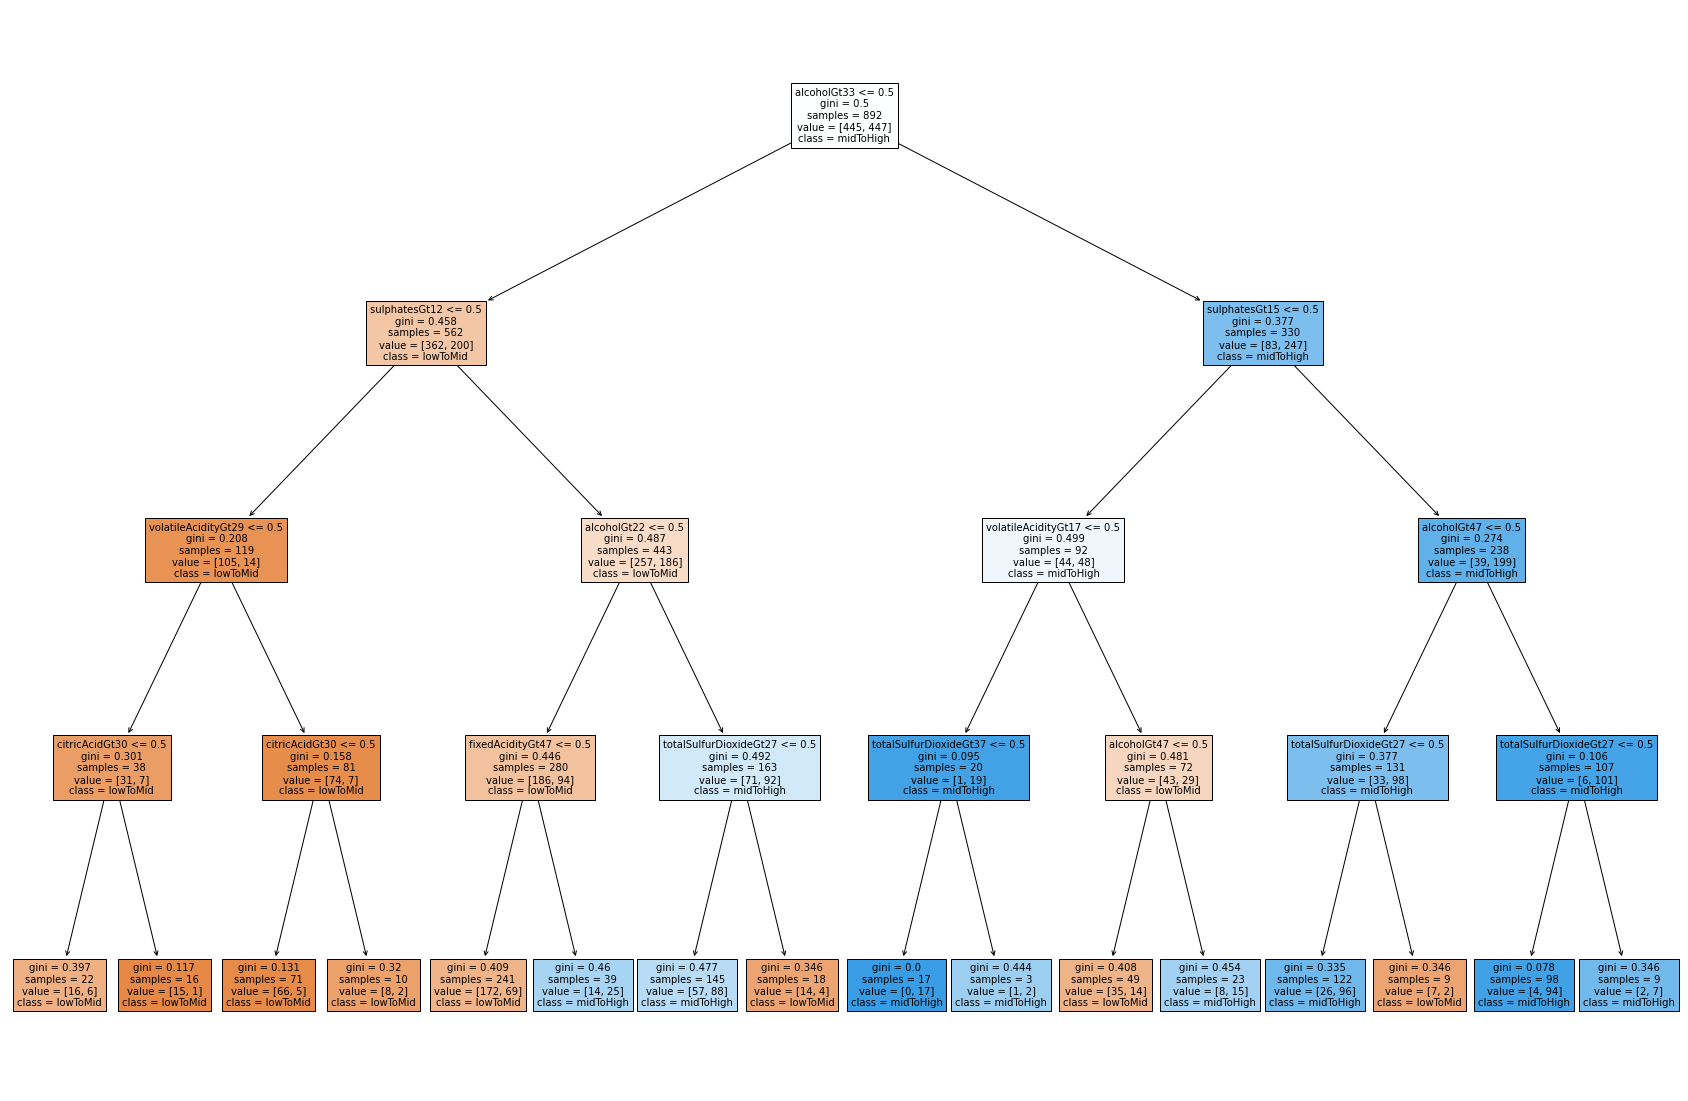

In [48]:
fig = plt.figure(figsize=(30,20))
var = sklearn.tree.plot_tree(modelo, feature_names = cols[2::],
                            filled = True, fontsize = 10,
                            class_names = ['lowToMid', 'midToHigh'])

### 4. Conclusiones

El objetivo de este trabajo fue usar un modelo de aprendizaje automático de árbol de decisión para poder hacer clasificación entre dos calidades distintas de vinos: baja-media y media-alta. La construcción de este árbol de decisión se hizo con un conjunto de datos que contenía información relacionada a la composición del vino (alcohol,  ácido cítrico, sulfatos, etc). A partir de éste, se pusieron a prueba un total de 34 modelos distintos: 17 siendo con criterio de índice gini cuya profundidad máxima iba de 2 a 18, el resto usaron la entropía como criterio y también variaban su profundidad máxima en el mismo rango que los otros. 

Al obtener todos estos distintos modelos, se propuso encontrar cuál era el más efectivo para ser utilizado como el definitivo. La manera en que se hizo esto fue evaluando el desempeño de cada uno con los datos del mismo conjunto de datos proporcionado (partiéndolo en 15% como datos de prueba y 85% de entrenamiento de los modelos). Para ello se utilizó la métrica $F_\beta$ con $\beta = 0.5$, lo cual le da prioridad a la precisión de un modelo respecto a sus resultados. 

Justificando la priorización de la precisión, fue que se considera un mejor caso clasificar erróneamente un vino de calidad media-alta que clasificar uno de media-baja erróneamente. La razón de esto siendo que consideramos que el peor escenario para un comprador de vino es conseguir un vino de calidad media-baja cuando en realidad creyó haber obtenido uno de calidad media-alta. (Mejor darle mayor peso a los falsos positivos) 

Finalizando esta evaluación del desempeño de todos los modelos, se llegó a la conclusión definitiva de que el mejor fue el modelo con los siguientes parámetros:
* Criterio: índice gini
* Máximo nivel de profundidad: 4

Resumiendo sus resultados dentro del mismo conjunto de entrenamiento tuvimos que $F_{0.5} = 76.72\%$ y obtuvo un $72.34\%$ de las clasificaciones correctas (*accuracy*). 

Finalmente, este modelo seleccionado fue evaluado con un conjunto de datos de prueba adicional. Utilizando todo el conjunto de datos de entrenamiento original, se entrenó al modelo y se hicieron predicciones de la calidad del vino del conjunto de prueba. Al final resultó ser que el modelo logró clasificar un $78.52\%$ de los datos correctamente y su puntaje $F_\beta$ fue $F_{0.5} = 79.22\%$. Demostrando así que este es un modelo aceptable para hacer clasificación de calidad de vinos dadas las propiedades de su composición.

La utilidad de este modelo puede ser para identificar qué componentes del vino son aquellos que influencian en mayor medida a su calidad. Por ejemplo, viendo el árbol de decisión proporcionado en el desarrollo observamos cómo la mayoría de vinos con calidad media-alta cuentan alcohol Gt33. Pero también es notable que si un vino tiene alcoholGt33, pero también acidez volátil Gt17 sin alcohol Gt47, entonces sería de calidad baja-media. Por otro lado los vinos de calidad baja-media en su mayoría no cuentan con el alcohol Gt33, llevándonos a la conclusión de que para tener vinos de la calidad media-alta es casi fundamental contar con este tipo de alcohol.

Esto no es todo, ya que se puede también crear vino de calidad media-alta sin necesidad del componente ya mencionado. Acorde al árbol de decisión, hay casos donde si tienes sulfatos Gt12, alcohol Gt22, y no tienes dióxido sulfuro total Gt27; o también si tienes sulfatos Gt12 sin alcohol Gt22 y si se cuenta con una acidez fija Gt47, esto resulta en vinos de buena calidad.

Éstas y varias observaciones más pueden ser realizadas a partir del modelo obtenido. Ya en el futuro esto podría ser usado para crear nuevos vinos de calidad media-alta o baja-media dependiendo de los objetivos que tenga cierto proveedor. También, esto se podría usar simplemente para hacer la clasificación de calidad de vinos para determinar si venderlos como productos de determinada calidad. 

En conclusión, el modelo creado tuvo un buen desempeño al predecir la calidad de los vinos. Dada la evaluación en el conjunto de prueba, podemos asegurar que el futuro uso de este modelo puede llegar a ser de utilidad. Siendo que éste ha tenido un desempeño de precisión y $F_{0.5}$ de alrededor del $75\%$ (sino un poco mayor). Se espera que, contando con la información de la composición del vino, será posible formular qué propiedades forman a un vino de calidad media-alta o baja-media. Dándonos predicciones que suelen ser correctas la mayoría de las veces.